- Ejemplo Series de Fourier
$$
g(x)= 
\left\{
\begin{array}{ll}
0 & \mbox{si  }  -\pi <x<0\\
x^2 & \mbox{si  }  0 <x<\pi\\
& \mbox{estendida con periodo } 2\pi
\end{array}\\
\right. 
$$

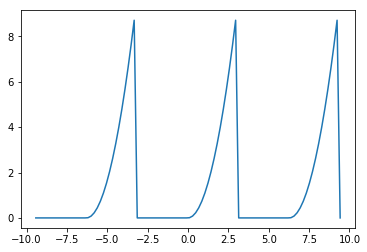

In [7]:
import numpy as np

#Metodo para evaluar la función periódica
def f(x):
    a=-np.pi
    b=np.pi
    interval=b-a
    s=(x - a) % interval + a
    return 0*(s<0)+(s**2)*(s>=0)

x = np.linspace(-3*np.pi, 3*np.pi,100)
y=f(x)
%matplotlib inline
import matplotlib.pyplot as plt 
plt.plot(x,f(x))

1


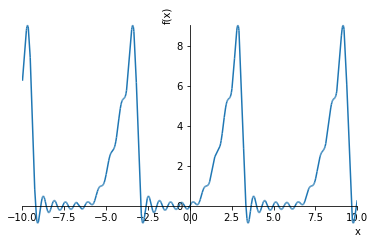

In [10]:
import sympy as sp
x=sp.symbols('x')
g1=0
g2=x**2
T=2*sp.pi
w=2*sp.pi/T
print(w)
a0=2/T * (sp.integrate(g1,(x,-sp.pi,0))+sp.integrate(g2,(x,0,sp.pi)))
serie=a0/2.
n=10
lserie=[]
for k in range(1,n):
    ak=2/T* (sp.integrate(g1*sp.cos(k*w*x),(x,-sp.pi,0))+sp.integrate(g2*sp.cos(k*w*x),(x,0,sp.pi)))
    bk=2/T* (sp.integrate(g1*sp.sin(k*w*x),(x,-sp.pi,0))+sp.integrate(g2*sp.sin(k*w*x),(x,0,sp.pi)))
    serie+=ak*sp.cos(k*w*x)+bk*sp.sin(k*w*x)
    lserie.append(serie)
#print(serie)
from sympy.plotting import plot
plot(serie)

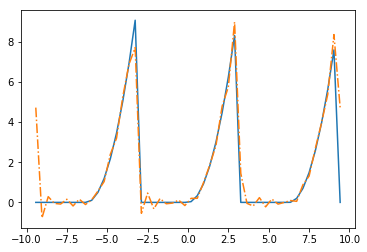

In [11]:
gserie=sp.lambdify(x,serie)
gseries=np.vectorize(gserie)

y = np.linspace(-3*np.pi, 3*np.pi)

plt.plot(y,f(y))
plt.plot(y,gseries(y),'-.')


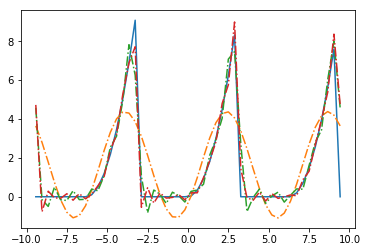

In [14]:
y = np.linspace(-3*np.pi, 3*np.pi)
plt.plot(y,f(y))
m=len(lserie)

for k in range(0,m,4):
    serie_k=lserie[k]
    gserie_k=sp.lambdify(x,serie_k)
    gseries_k=np.vectorize(gserie_k)
    plt.plot(y,gseries_k(y),'-.')